In [94]:
from keras.models import Sequential, Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import plot_random_img

In [ ]:
def get_data(csv_path='data/train.csv'):
    
    df=pd.read_csv(csv_path)
    df['ClassId']=df['ClassId'].astype(str)

    train_datagen = ImageDataGenerator(rescale=1/255.,
                                       validation_split = 0.2)
                                       
    train_data = train_datagen.flow_from_dataframe(dataframe=df,
                                                directory='data/train_images',
                                                target_size=(128, 800), x_col='ImageId',
                                                y_col='ClassId', batch_size=16,
                                                class_mode='categorical', subset = "training",
                                                shuffle=True)
    valid_data = train_datagen.flow_from_dataframe(dataframe=df,
                                                directory='data/train_images',
                                                target_size=(128, 800), x_col='ImageId',
                                                y_col='ClassId', batch_size=16,
                                                class_mode='categorical', subset = "validation",
                                                shuffle=True)
    return train_data, valid_data

In [ ]:
train_data, valid_data = get_data(csv_path='data/train.csv')

(-0.5, 799.5, 127.5, -0.5)

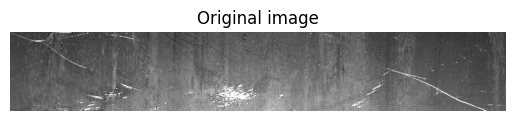

In [102]:
plot_random_img(train_data)

In [103]:
class_count = np.bincount(train_data.classes)

In [104]:
class_count

array([ 703,  184, 4137,  652])

In [105]:
model = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(128, 800, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(4, activation='softmax') 
])

# Compile the model
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

94765736/94765736 [==============================] - 79s 1us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 800, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 4, 25, 2048)       23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 8,196
Non-trainable params: 23,587,712
_________________________________________________________________


In [106]:
class_weight = {0: 6.23,
                1: 23.87,
                2: 1.06,
                3: 6.73}
# Fit the model
history = model.fit(train_data, # now 10 different classes 
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data),
                    class_weight=class_weight)

Epoch 1/5


2023-04-10 13:53:42.934559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


355/355 [==============================] - ETA: 0s - loss: 4.3458 - accuracy: 0.2340

2023-04-10 14:12:16.965123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


355/355 [==============================] - 1409s 4s/step - loss: 4.3458 - accuracy: 0.2340 - val_loss: 1.2661 - val_accuracy: 0.7125
Epoch 2/5
355/355 [==============================] - 1524s 4s/step - loss: 4.2433 - accuracy: 0.2155 - val_loss: 1.2828 - val_accuracy: 0.7026
Epoch 3/5
355/355 [==============================] - 1596s 4s/step - loss: 4.1662 - accuracy: 0.2422 - val_loss: 1.4002 - val_accuracy: 0.2093
Epoch 4/5
355/355 [==============================] - 1606s 5s/step - loss: 4.1072 - accuracy: 0.2613 - val_loss: 1.4811 - val_accuracy: 0.1219
Epoch 5/5
327/355 [==========================>...] - ETA: 1:36:55 - loss: 4.0738 - accuracy: 0.2500

KeyboardInterrupt: 

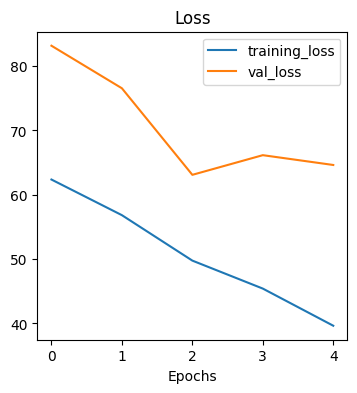

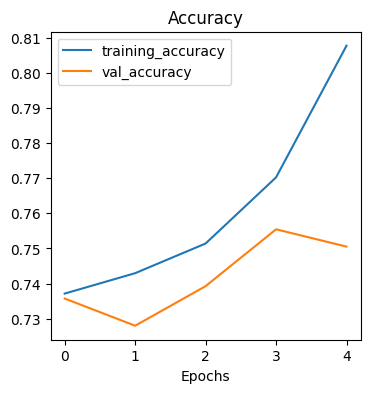

In [53]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  val_loss = [i*100. for i in val_loss]
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.figure(figsize=(4,4))
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure(figsize=(4,4))
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
plot_loss_curves(history) # to utils

In [54]:
# Save a model
model.save("models/defect_classify")

INFO:tensorflow:Assets written to: models/defect_classify/assets


INFO:tensorflow:Assets written to: models/defect_classify/assets


In [27]:

# Evaluate on the test data
model.evaluate(train_data)

2023-04-06 12:37:19.862606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


355/355 [==============================] - 66s 185ms/step - loss: 0.7470 - accuracy: 0.7290


[0.7470074892044067, 0.7290345430374146]

In [87]:
predicted = model.predict(train_data)

2023-04-10 13:43:20.466115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


355/355 [==============================] - 128s 361ms/step


In [88]:
actual = train_data.classes

In [89]:
predicted_new = []
for i in range(len(predicted)):
    predicted_new.append(np.argmax(predicted[i]))

In [90]:
print(actual)
print(predicted_new)

[3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 0, 2, 0, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 2, 0, 2, 3, 2, 0, 2, 3, 2, 2, 2, 2, 2, 0, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 0, 2, 3, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 3, 3, 0, 2, 2, 3, 3, 1, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 0, 3, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 3, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 0, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 3, 2, 2, 0, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 0, 1, 2, 2, 0, 1, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [91]:
from sklearn import metrics 
confusion_matrix = metrics.confusion_matrix(actual, predicted_new) 

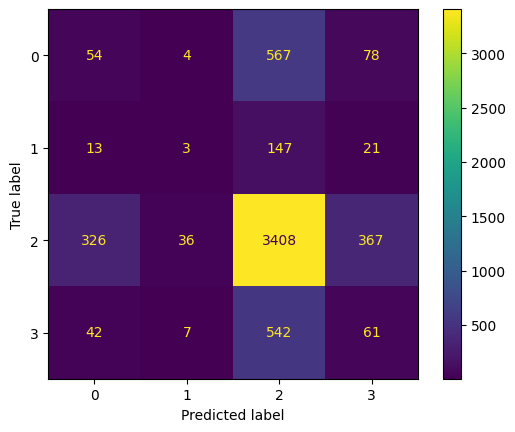

In [92]:

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3])

cm_display.plot()
plt.show() 